# Self work - Project 
##### Done by 
## Ramakrishnan Subramanian

## Problem:
    - To classify people into different salary groups based on the information about their lifestyle, gender, education etc. 

## Contents
1. **[EDA](#EDA)**

2. **[Data Engineering](#engg)**

2. **[KNN Imputation](#NULL)**

3. **[Logistic Regression](#log)**

4. **[Handling the imbalances](#imb)**

5. **[Selection of best model](#best) [7 models considered]**

6. **[XGB - Base Model](#base)**
 
7. **[Hyperparameter tuning](#hyp)**

8. **[Fitting the final model](#final)**

9. **[Threshold tuning](#thres)**

### About the dataset:
    Age - Age of the person
    Workclass - Sector that the person works in, government, private, etc.
    Education - Maximum education that was received by the person
    Education_num - Numerical representation of each education class
    Martial_Status - Relationship status
    Occupation - Work that the person is involded with
    Relationship - Relationship title that the person holds in the family
    Race - Denoting skin color
    Gender - Sex of the person
    Capital_Gain - asset value
    Hours_per_Week - Working hours per week 
    Country - Country where the person resides in
    Salary_Group - Target Feature - Groups based on salary that people are classified into

##### Importing important libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15,8]

##### Read the data

In [9]:
data= pd.read_csv('HR_data1.csv')
data.head(2)

,Age,Workclass,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Country,Salary_Group
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K


<a id="EDA"></a>
## Expolatory Data Analyis 

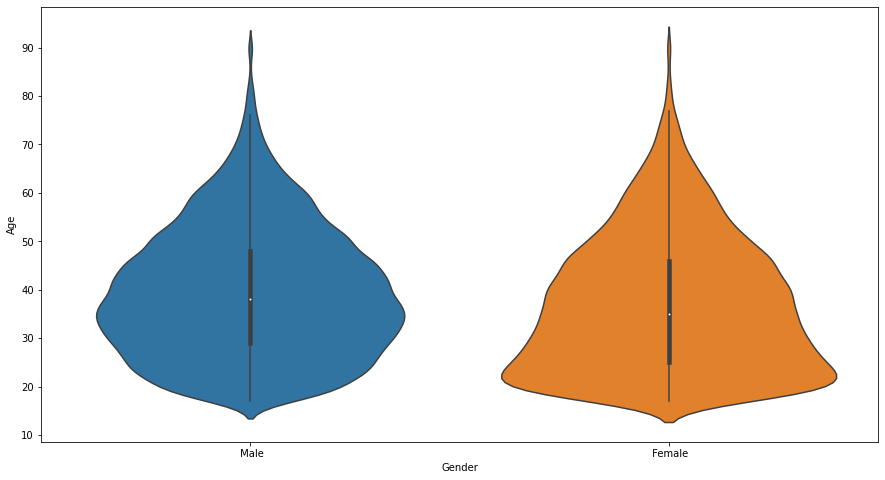

In [26]:
sns.violinplot(x = data['Gender'], y = data['Age'])

- Inferences:
    - We see the minimum and maximum age of men and women are about the same. 
    - However, we see most of the women who work are of age between 20 and 30 and most of the men belong to the age between 25 and 40.
    

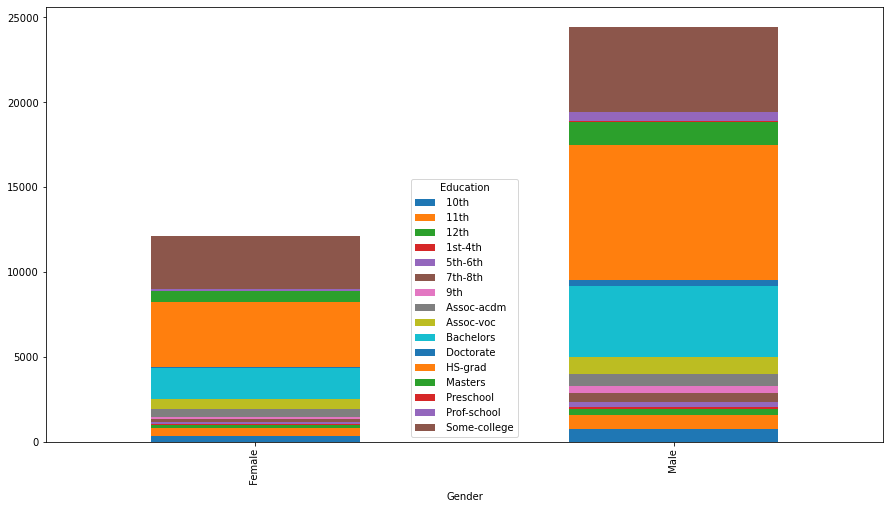

In [22]:
pd.crosstab(data['Gender'],data['Education']).plot(kind = 'bar', stacked = True)

- Inferences:
    - Most of the women and men have at least HS-graduation level of education
    - Most of men and women have also finished their pre-school

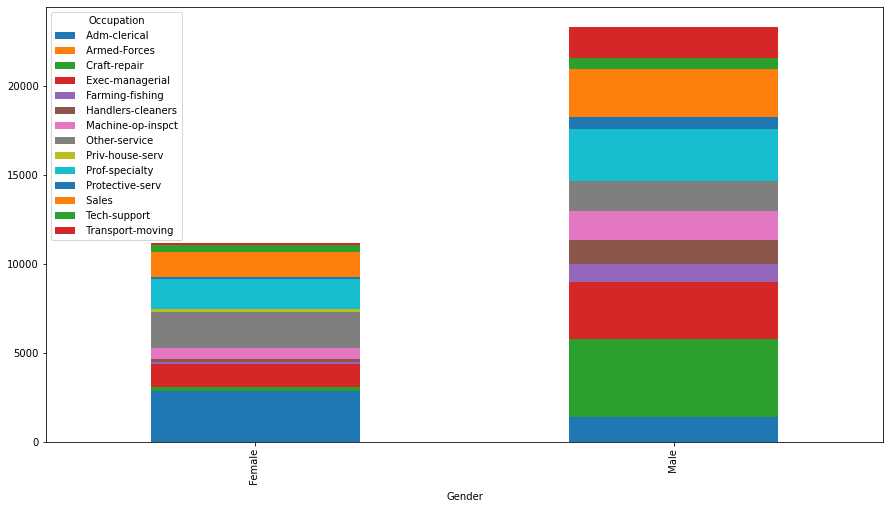

In [21]:
pd.crosstab(data['Gender'],data['Occupation']).plot(kind = 'bar', stacked = True)

- Inferences:
    - Most of the men work in the armed forces, followed by Sales
    - Most of the women work as Adm-Clerical and followed by professor profession. 

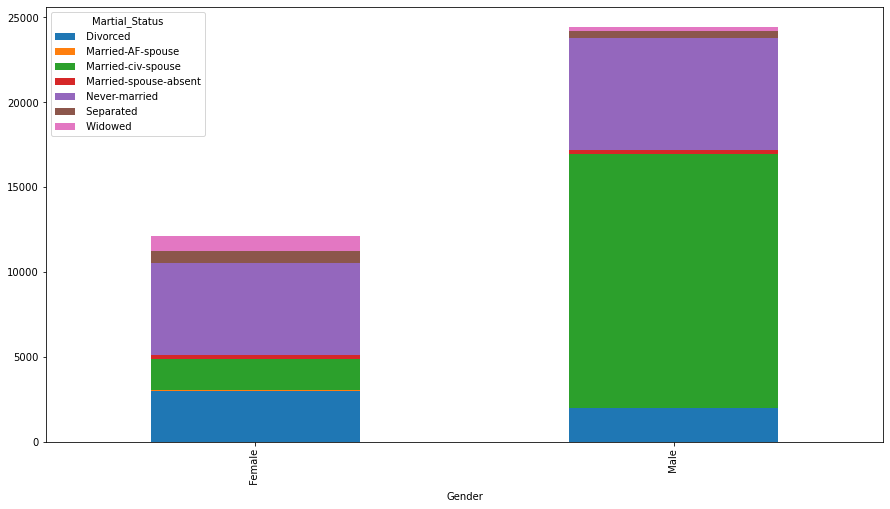

In [20]:
pd.crosstab(data['Gender'],data['Martial_Status']).plot(kind = 'bar', stacked = True)

- Inferences:
    - Most of the men in the dataset are married whose spouse is in the armed forces
    - Second highest percentage of men in the dataset are unmarried men,
    - Most of the women in the dataset are unmarried, then followed by Divorced women.
    

<a id="engg"></a>
## Data Engineering

##### Encoding the Salary Group [target feature]

In [20]:
cat_data=data.select_dtypes(exclude=np.number)

In [21]:
for i in cat_data.columns:
    data[i]=data[i].str.strip()

In [22]:
data['Salary_Group'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [23]:
data['Salary_Group']=data['Salary_Group'].replace({'<=50K':0,'<=50K.':0,'>50K.':1,'>50K':1})

##### Inferences:
    - There are two classes of people in the dataset depending upon the salary group.

##### Number of records in each class

In [24]:
data['Salary_Group'].value_counts(normalize=True)

0    0.758918
1    0.241082
Name: Salary_Group, dtype: float64

##### Inferences:
    - The data is imbalanced
    - Majority of the people belongs to Class 0 (<= 50K)

##### Checking Null Values

In [25]:
data.isnull().sum()/len(data)

Age               0.054754
Workclass         0.056917
Education         0.000000
Education_Num     0.000000
Martial_Status    0.000000
Occupation        0.057136
Relationship      0.000000
Race              0.000000
Gender            0.000000
Capital_Gain      0.000000
Capital_Loss      0.000000
Hours_per_week    0.030087
Country           0.017959
Salary_Group      0.000000
dtype: float64

<a id="NULL"></a>
##### Imputing the null values of the numerical features

In [27]:
num_data=data.select_dtypes(include=np.number)

In [28]:
impu=KNNImputer()
num_data_fill=impu.fit_transform(num_data)
num_data_fill=pd.DataFrame(num_data_fill,columns=num_data.columns)

In [29]:
num_data_fill.isnull().sum()

Age               0
Education_Num     0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Salary_Group      0
dtype: int64

##### Imputing the null values of categorical features

In [30]:
cat_data=data.select_dtypes(exclude=np.number)
cat_data.isnull().sum()/len(cat_data)

Workclass         0.056917
Education         0.000000
Martial_Status    0.000000
Occupation        0.057136
Relationship      0.000000
Race              0.000000
Gender            0.000000
Country           0.017959
dtype: float64

In [31]:
print(cat_data['Workclass'].value_counts(normalize=True))
print(cat_data['Country'].value_counts(normalize=True))
print(cat_data['Occupation'].value_counts(normalize=True))

Private             0.738533
Self-emp-not-inc    0.082588
Local-gov           0.068306
State-gov           0.042180
Self-emp-inc        0.036287
Federal-gov         0.031410
Without-pay         0.000464
Never-worked        0.000232
Name: Workclass, dtype: float64
United-States                 0.912213
Mexico                        0.019849
Philippines                   0.006189
Germany                       0.004321
Canada                        0.003903
Puerto-Rico                   0.003680
El-Salvador                   0.003178
India                         0.003122
Cuba                          0.002927
England                       0.002704
China                         0.002593
South                         0.002565
Jamaica                       0.002397
Italy                         0.002286
Dominican-Republic            0.002202
Vietnam                       0.002091
Japan                         0.001979
Guatemala                     0.001924
Columbia                      0.00

- Occupation feature cannot be filled randomly with any data, so 'missing' string will be imputed
- Owing to the fact that these data is categorical, Country and WorkClass are replaced by Mode.

In [32]:
cat_data['Occupation']=cat_data['Occupation'].fillna('Missing')
cat_data['Country']=cat_data['Country'].fillna(cat_data['Country'].mode()[0])
cat_data['Workclass']=cat_data['Workclass'].fillna(cat_data['Workclass'].mode()[0])

In [33]:
cat_data.isnull().sum()

Workclass         0
Education         0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Country           0
dtype: int64

##### Concatenating numerical and categorical features

In [34]:
data_final=pd.concat([num_data_fill,cat_data],axis=1)

In [35]:
data_final.isnull().sum().sum()

0

##### Inferences:
    - There are no null values

##### Further Simplification of features

In [18]:
data_final.head(2)

,Age,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Salary_Group,Workclass,Education,Martial_Status,Occupation,Relationship,Race,Gender,Country
0,39.0,13.0,2174.0,0.0,40.0,0.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,50.0,13.0,0.0,0.0,13.0,0.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


##### Converting few categorical features into numerical features based on their percentages of records in the dataset.

In [36]:
data_final['Occupation']=data_final.groupby('Occupation')['Salary_Group'].transform('sum')

In [38]:
data_final['Occupation']=data_final['Occupation']/len(data_final)*100

In [42]:
data_final['Country']=data_final.groupby('Country')['Salary_Group'].transform('sum')
data_final['Country']=data_final['Country']/len(data_final)*100

In [43]:
data_final['Workclass']=data_final.groupby('Workclass')['Salary_Group'].transform('sum')
data_final['Workclass']=data_final['Workclass']/len(data_final)*100

In [44]:
data_final['Martial_Status']=data_final.groupby('Martial_Status')['Salary_Group'].transform('sum')
data_final['Martial_Status']=data_final['Martial_Status']/len(data_final)*100

In [45]:
data_final['Relationship']=data_final.groupby('Relationship')['Salary_Group'].transform('sum')
data_final['Relationship']=data_final['Relationship']/len(data_final)*100

##### Handling 'Education feature'

In [48]:
data_final['Education'].nunique()

16

In [49]:
data_final=data_final.drop('Education',axis=1)

- Dropping the 'Education' feature as it has 16 unique records and give rise to data complexity and increase the computational time

##### Encoding the categorical features

In [50]:
data_final=pd.get_dummies(data_final,columns=['Gender','Race'], drop_first=True)

In [51]:
data_final.head(2)

,Age,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Salary_Group,Workclass,Martial_Status,Occupation,Relationship,Country,Gender_Male,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,39.0,13.0,2174.0,0.0,40.0,0.0,1.067703,1.500260,1.555014,2.625455,22.473787,1,0,0,0,1
1,50.0,13.0,0.0,0.0,13.0,0.0,2.217538,20.579298,5.970926,18.222137,22.473787,1,0,0,0,1


## Machine Learning Models

<a id="log"></a>
### Basic Logistic Regression

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

inp=data_final.drop('Salary_Group',axis=1)
out=data_final['Salary_Group']
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48)

lm=LogisticRegression()
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      8276
         1.0       0.62      0.45      0.52      2683

    accuracy                           0.80     10959
   macro avg       0.73      0.68      0.70     10959
weighted avg       0.78      0.80      0.79     10959



##### - Inferences:
    - Prediction of class 1 is poor. 
    - This is because the model is trained better in predicting the class 0 since more records of class 0 are present.

<a id="imb"></a>
### Handling the Imbalances in the data

In [58]:
data_final['Salary_Group'].value_counts()

0.0    27721
1.0     8806
Name: Salary_Group, dtype: int64

##### SMOTE technique

In [62]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [63]:
count_class_0 = 20000
count_class_1 = 14000
pipe = make_pipeline(SMOTE(sampling_strategy={1: count_class_1})
                    ,NearMiss(sampling_strategy={0: count_class_0}))
inp_bal, out_bal = pipe.fit_resample(inp, out)

In [75]:
out_bal.value_counts()

0.0    20000
1.0    14000
Name: Salary_Group, dtype: int64

In [77]:
6000/18915

0.317208564631245

##### Inferences:
    - The difference in imbalances are brought down from 18,915 to 6000, which is 32% improvement in balancing of the data.

##### Refitting the model with balanced dataset

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(inp_bal,out_bal,test_size=0.3,random_state=48)

In [65]:
lm=LogisticRegression()
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)

In [66]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82      6016
         1.0       0.76      0.66      0.71      4184

    accuracy                           0.78     10200
   macro avg       0.77      0.76      0.76     10200
weighted avg       0.78      0.78      0.77     10200



##### Inferences:
    - Prediction of class 1 has improved, from 45% to 66%, thanks to SMOTE technique.

<a id="best"></a>
## Choosing the best ML Model 

##### import all the necessary ML libraries

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.naive_bayes import MultinomialNB

In [92]:
# 7 models are considered

clf1 = LogisticRegression(random_state=20)
clf2 = DecisionTreeClassifier(random_state=20)
clf3 = RandomForestClassifier(random_state=20)
clf4 = AdaBoostClassifier(random_state=20) 
clf5 = GradientBoostingClassifier(random_state=20)
clf6 = XGBClassifier(random_state=20)
clf7 = MultinomialNB()

##### KFOLD-CV 
    - for better approximation of model performance

In [93]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)

##### Scoring Metric - Accuracy

In [95]:
model = []
ba = []
cov = []
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7],['LR','DT','RF','Ada','GradB','XGB','MNB']):
    score = cross_val_score(i, inp_bal, out_bal, cv=kf, scoring = 'accuracy')
    print(j,np.mean(score),np.std(score)/np.mean(score))
    model.append(j)
    ba.append(np.mean(score))
    cov.append(np.std(score)/np.mean(score))

LR 0.7763235294117646 0.009922217324861284
DT 0.8118235294117648 0.006373261071002007
RF 0.8484705882352941 0.0035530636605847787
Ada 0.8309411764705883 0.007521570570716817
GradB 0.8441470588235294 0.0062028531295627775
XGB 0.8634117647058822 0.0057993895476306
MNB 0.7163823529411765 0.0064597608622464055


##### Scoring Metric - ROC-AUC

In [97]:
model1 = []
ba1 = []
cov1 = []
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7],['LR','DT','RF','Ada','GradB','XGB','MNB']):
    score = cross_val_score(i, inp_bal, out_bal, cv=kf, scoring = 'roc_auc')
    print(j,np.mean(score),np.std(score)/np.mean(score))
    model1.append(j)
    ba1.append(np.mean(score))
    cov1.append(np.std(score)/np.mean(score))

LR 0.8606911360732831 0.007417797931302512
DT 0.8183443107388391 0.0065281262331160625
RF 0.9252242469013288 0.004338817905089724
Ada 0.9181189083309874 0.00335152586857573
GradB 0.9270557515846118 0.003465117267518672
XGB 0.9418290528786073 0.002496789444267689
MNB 0.459597909949278 0.008664479718077421


##### Scoring Metric - F1

In [98]:
model2 = []
ba2 = []
cov2 = []
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7],['LR','DT','RF','Ada','GradB','XGB','MNB']):
    score = cross_val_score(i, inp_bal, out_bal, cv=kf, scoring = 'f1')
    print(j,np.mean(score),np.std(score)/np.mean(score))
    model2.append(j)
    ba2.append(np.mean(score))
    cov2.append(np.std(score)/np.mean(score))

LR 0.7075012498825328 0.011745645320430025
DT 0.7694426751917728 0.008581666190991514
RF 0.8120896069141599 0.0033391392282300174
Ada 0.7884545132117757 0.00846237319220838
GradB 0.8049747770637898 0.008393696605830886
XGB 0.8298394189185666 0.006782772106901683
MNB 0.476489808714624 0.017286254017726745


##### Scoring Metric - ROC_AUC 
    - Imbalanced data

In [99]:
model3 = []
ba3 = []
cov3 = []
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7],['LR','DT','RF','Ada','GradB','XGB','MNB']):
    score = cross_val_score(i, inp, out, cv=kf, scoring = 'roc_auc')
    print(j,np.mean(score),np.std(score)/np.mean(score))
    model3.append(j)
    ba3.append(np.mean(score))
    cov3.append(np.std(score)/np.mean(score))

LR 0.8329025217047892 0.0029914121425528655
DT 0.7717857155107657 0.00807598945805628
RF 0.9033467342278468 0.002659163283869701
Ada 0.9157695147449099 0.002124955651285909
GradB 0.923580199126801 0.0026313599738155965
XGB 0.9305554251294861 0.0027959411482692824
MNB 0.3493044994095814 0.020102439629811713


In [120]:
iterables = [['Accuracy','roc_auc','f1','roc_auc (imb)'],['BA','Coef_Var']]
indexx = pd.MultiIndex.from_product(iterables, names=['Metrix', 'Score'])

result_comparison = pd.DataFrame([ba,cov,ba1,cov1,ba2,cov2, ba3,cov3], columns = model)

result_comparison.set_index(indexx, inplace=True)

result_comparison

LR        DT        RF       Ada     GradB  \
Metrix        Score                                                        
Accuracy      BA        0.776324  0.811824  0.848471  0.830941  0.844147   
              Coef_Var  0.009922  0.006373  0.003553  0.007522  0.006203   
roc_auc       BA        0.860691  0.818344  0.925224  0.918119  0.927056   
              Coef_Var  0.007418  0.006528  0.004339  0.003352  0.003465   
f1            BA        0.707501  0.769443  0.812090  0.788455  0.804975   
              Coef_Var  0.011746  0.008582  0.003339  0.008462  0.008394   
roc_auc (imb) BA        0.832903  0.771786  0.903347  0.915770  0.923580   
              Coef_Var  0.002991  0.008076  0.002659  0.002125  0.002631   

                             XGB       MNB  
Metrix        Score                         
Accuracy      BA        0.863412  0.716382  
              Coef_Var  0.005799  0.006460  
roc_auc       BA        0.941829  0.459598  
              Coef_Var  0.002497  0.008664  
f1            BA        0.829839  0.476490  
              Coef_Var  0.006783  0.017286  
roc_auc (imb) BA        0.930555  0.349304  
              Coef_Var  0.002796  0.020102

##### XGB and RF
  - ROC_AUC

In [123]:
94.18 - 92.52, 0.2497 - 0.4339

(1.6600000000000108, -0.1842)

##### XGB and RF 
- Accuracy

In [121]:
86.34 - 84.84, 0.5799 - 0.3553

(1.5, 0.22459999999999997)

##### XGB and RF
- F1

In [122]:
82.98 - 81.2, 0.6783 - 0.3339

(1.7800000000000011, 0.34440000000000004)

- Inferences:
    - XGB model outperforms all the other models. 
    - RandomForest model's scores are very close to XGB model.
        - On comparing their scores' differences, XGB model's trade-off on Bias accuracy and Coefficient of Variance is better.
        - Therefore, going ahead with XGBClassifier model

<a id="base"></a>
### Non-Linear Models
###### XGBClassifier

In [124]:
XGB = XGBClassifier(random_state = 20)
XGB.fit(xtrain,ytrain)
ypred=XGB.predict(xtest)

In [125]:
feat_imp=pd.DataFrame()
feat_imp['Feature']=xtrain.columns
feat_imp['Importance']=XGB.feature_importances_

In [126]:
feat_imp.sort_values('Importance',ascending=False)

,Feature,Importance
6,Martial_Status,0.309187
2,Capital_Gain,0.293996
3,Capital_Loss,0.106948
1,Education_Num,0.066022
8,Relationship,0.048568
7,Occupation,0.036796
13,Race_Other,0.021402
10,Gender_Male,0.019948
0,Age,0.019784
5,Workclass,0.018311


- Inferences:
    - Marital Status and Capital Gain seem to be the most important features that have impact on the salary groups.
    - Race, Country, Workclass, age and hours-per-week appear to be least important features.

<a id="hyp"></a>
## Hyperparameter tuning

In [128]:
# Parameter Tuning
be=[]
ve=[]
for i in [5,10,20,40,60,80,100,120,150,200,250,300,400]:
    XGB = XGBClassifier(n_estimators=i,random_state=20)
    score=cross_val_score(XGB,inp_bal,out_bal,cv=kf,scoring='f1')
    print('\nn_estimator:',i)
    print('Bias Error',1-np.mean(score))
    print('Variance Error',np.std(score)/np.mean(score))
    be.append(1-np.mean(score))
    ve.append(np.std(score)/np.mean(score))


n_estimator: 5
Bias Error 0.21685560484328958
Variance Error 0.0070121085716451466

n_estimator: 10
Bias Error 0.1988870429397167
Variance Error 0.008454735290311054

n_estimator: 20
Bias Error 0.18702668701644798
Variance Error 0.007310218530937616

n_estimator: 40
Bias Error 0.1738979775790923
Variance Error 0.008044119573374949

n_estimator: 60
Bias Error 0.17176049686773798
Variance Error 0.00635852661310569

n_estimator: 80
Bias Error 0.17057721257197256
Variance Error 0.008184913363546174

n_estimator: 100
Bias Error 0.1701605810814334
Variance Error 0.006782772106901683

n_estimator: 120
Bias Error 0.1677628539147038
Variance Error 0.005891360845702134

n_estimator: 150
Bias Error 0.16860194395997508
Variance Error 0.00692555610061548

n_estimator: 200
Bias Error 0.1685123872608001
Variance Error 0.007683859258159628

n_estimator: 250
Bias Error 0.17013208902226162
Variance Error 0.00866242995649562

n_estimator: 300
Bias Error 0.17153652340517045
Variance Error 0.0062454603981

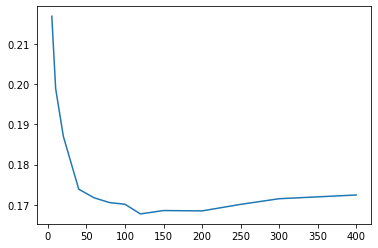

In [129]:
from matplotlib import pyplot as plt
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],be)

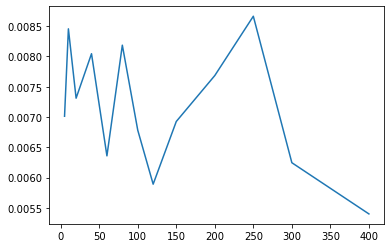

In [130]:
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],ve)

In [131]:
be1=pd.DataFrame(be)/pd.DataFrame(be).sum()
ve1=pd.DataFrame(ve)/pd.DataFrame(ve).sum()

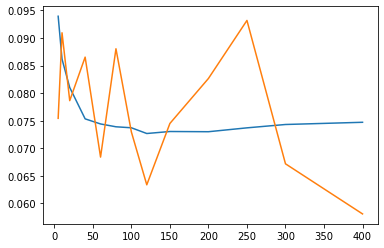

In [132]:
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],be1)
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],ve1)

#####  Inference:
    - At n_estimator = 120, bias error and coefficient of variance appear to be low and have a good trade-off.
    - Therefore, n_estimators = 120.

In [137]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[120],
        "learning_rate":[0.01,0.1,1,10,100],
        'max_depth':[10,15,20,25,30,40]}

XGB_mod1 = XGBClassifier()
hyp_mod=GridSearchCV(XGB_mod1,param_grid=params,scoring='f1', cv=kf)

tun_mod=hyp_mod.fit(xtrain,ytrain)

In [138]:
tun_mod.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 120}

In [139]:
tun_mod.best_score_

0.8248822504113532

In [140]:
res=pd.DataFrame(tun_mod.cv_results_)
res.shape

(30, 16)

In [141]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.784824,0.064399,0.029717,0.005166,0.01,10,120,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.806838,0.802658,0.798668,0.803257,0.797900,0.801864,0.003263,8
1,2.913876,0.103500,0.041049,0.011148,0.01,15,120,"{'learning_rate': 0.01, 'max_depth': 15, 'n_es...",0.812966,0.804478,0.793388,0.803236,0.797604,0.802334,0.006646,7
2,3.560577,0.099434,0.044422,0.002654,0.01,20,120,"{'learning_rate': 0.01, 'max_depth': 20, 'n_es...",0.811437,0.801347,0.798257,0.799685,0.790807,0.800307,0.006630,9
3,4.139391,0.197639,0.045914,0.004842,0.01,25,120,"{'learning_rate': 0.01, 'max_depth': 25, 'n_es...",0.809561,0.796263,0.799794,0.799790,0.786851,0.798452,0.007299,13
4,4.745063,0.328409,0.054406,0.010000,0.01,30,120,"{'learning_rate': 0.01, 'max_depth': 30, 'n_es...",0.806684,0.795225,0.799897,0.801573,0.785807,0.797837,0.007043,15
5,4.604132,0.152796,0.046398,0.007774,0.01,40,120,"{'learning_rate': 0.01, 'max_depth': 40, 'n_es...",0.806684,0.795225,0.799897,0.801573,0.785286,0.797733,0.007222,16
6,1.672955,0.043611,0.033406,0.004572,0.1,10,120,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.835905,0.817900,0.820196,0.828113,0.822298,0.824882,0.006471,1
7,2.749372,0.104306,0.046094,0.009666,0.1,15,120,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.826948,0.812143,0.811662,0.823220,0.805577,0.815910,0.007928,2
8,3.520853,0.032959,0.048159,0.003059,0.1,20,120,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",0.820988,0.805512,0.809180,0.812829,0.805202,0.810742,0.005828,3
9,4.394883,0.151111,0.051507,0.001026,0.1,25,120,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.817503,0.803947,0.807027,0.810399,0.808060,0.809387,0.004557,4


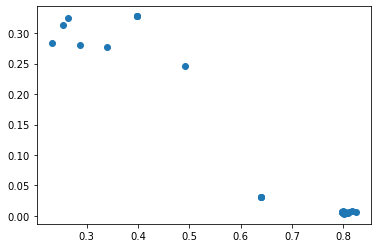

In [147]:
plt.scatter(res['mean_test_score'],res['std_test_score'])
plt.show()

In [151]:
res[(res['mean_test_score'] > 0.8) & (res['std_test_score'] < 0.005)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.784824,0.064399,0.029717,0.005166,0.01,10,120,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.806838,0.802658,0.798668,0.803257,0.79790,0.801864,0.003263,8
9,4.394883,0.151111,0.051507,0.001026,0.1,25,120,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.817503,0.803947,0.807027,0.810399,0.80806,0.809387,0.004557,4


<a id="final"></a>
# Fitting the training data to the tuned model
### Model Training

In [142]:
final_mod=XGBClassifier(**tun_mod.best_params_)

In [143]:
final_mod.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Model Testing

In [144]:
ypred1=final_mod.predict(xtest)
ypred1_train=final_mod.predict(xtrain)

In [145]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      6016
         1.0       0.85      0.82      0.83      4184

    accuracy                           0.87     10200
   macro avg       0.86      0.86      0.86     10200
weighted avg       0.87      0.87      0.87     10200



In [146]:
score = cross_val_score(final_mod, inp_bal, out_bal, cv=kf, scoring='f1')
print(np.mean(score),np.std(score)/np.mean(score))

0.8302069166407605 0.006033830349607658


### Model Evaluation using KFold-CV

In [153]:
## K-fold CV, model eval

kf = KFold(n_splits=7,shuffle=True,random_state=20)
score = cross_val_score(final_mod, inp_bal, out_bal, cv=kf, scoring='f1')
print(np.mean(score),np.std(score)/np.mean(score))

0.8321848167373831 0.0070797709246463985


<a id="thres"></a>
#### Threshold Tuning

In [158]:
prob=final_mod.predict_proba(xtest)
prob_1=prob[:,1]

In [159]:
for i in [0.2,0.3,0.4,0.5,0.6,0.8]:
    ypred1=np.zeros([len(ytest),1])
    ypred1[prob_1>=i]=1
    print("The report for Th = ",i)
    print(confusion_matrix(ytest,ypred1))
    print(classification_report(ytest,ypred1))
    

The report for Th =  0.2
[[4296 1720]
 [ 225 3959]]
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.82      6016
         1.0       0.70      0.95      0.80      4184

    accuracy                           0.81     10200
   macro avg       0.82      0.83      0.81     10200
weighted avg       0.85      0.81      0.81     10200

The report for Th =  0.3
[[4756 1260]
 [ 373 3811]]
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85      6016
         1.0       0.75      0.91      0.82      4184

    accuracy                           0.84     10200
   macro avg       0.84      0.85      0.84     10200
weighted avg       0.86      0.84      0.84     10200

The report for Th =  0.4
[[5122  894]
 [ 543 3641]]
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88      6016
         1.0       0.80      0.87      0.84      4184

    accuracy              

##### Inferences:
    - 0.5 as the threshold appear to give a balanced recall and percision

### Conclusion

- In this model both False Negative and False Positives are costly errors as we don't want to classify people wrongly under different groups. Therefore, F1 score is the appropriate scoring metric for this problem.
- F1 score - Test of accuracy: 2* ((Percision*Recall)/ Percision + Recall):
    - 83.21% for this dataset
- The tuned model is predicting 89.67% of group 1 (Class 0) correctly and 10.32% wrongly. 
- And is predicting 82.05% of group 2 (Class 1) correctly and 19.95% wrongly.